## CLASSIFICATION USING SVM WITH TWO DIFFERENT KERNEL FUNCTIONS

### Introduction

In this assignment, we delve into the realm of home loan prediction using Support Vector Machines (SVM), a powerful class of machine learning algorithms known for their effectiveness in classification tasks. Specifically, we explore SVM with two distinct kernel functions – the linear kernel and the radial basis function (RBF) kernel. Through this analysis, we aim to discern the performance of SVM in the nuanced task of predicting whether a home loan will be approved or denied.

### About The Dataset

The bank collects a dataset containing information about past loan applicants, including features such as income, credit score, loan amount, debt-to-income ratio, and employment duration. The target variable is binary, indicating whether the loan was approved (1) or not (0).

### Data Preprocessing

In [1]:
import pandas as pd

#load the dataset
df = pd.read_csv('Home Loan Prediction.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


### Handling Missing Values

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer  # Import SimpleImputer

#for numerical variables, fill missing values with mean
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_features] = numerical_imputer.fit_transform(df[numerical_features])

#for categorical variables, fill missing values with the most frequent value
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

In [4]:
#recheck if missing values are there
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Hence, now we see that the missing values are handled.

In [5]:
#drop specified columns
columns_to_drop = ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df = df.drop(columns=columns_to_drop)

In [6]:
#handle 'Dependents' as a categorical variable
df['Dependents'] = df['Dependents'].replace('3+', 3)  # Convert '3+' to 3
df['Dependents'] = df['Dependents'].astype(int)

In [7]:
#assuming 'target' is the name of the target variable
X = df.drop('Credit_History', axis=1)
y = df['Credit_History']

### Data Preparation

The dataset is preprocessed, missing values are handled, and categorical variables are encoded. Now, the data is split into training and testing sets (80-20 split), and features are standardized to ensure a consistent scale.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#create 'Loan_Status' based on a Credit_History threshold
df['Loan_Status'] = (df['Credit_History'] == 1).astype(int)

#split the data into training and testing sets
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### SVM with Linear Kernel

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#create an SVM model with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

#predictions on the test set
y_pred_linear = svm_linear.predict(X_test)

#evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {accuracy_linear}")
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

Accuracy with Linear Kernel: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        55

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



### SVM with RBF Kernel

In [10]:
#create an SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

#predictions on the test set
y_pred_rbf = svm_rbf.predict(X_test)

#evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel: {accuracy_rbf}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Accuracy with RBF Kernel: 0.9864864864864865
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.98      1.00      0.99        55

    accuracy                           0.99        74
   macro avg       0.99      0.97      0.98        74
weighted avg       0.99      0.99      0.99        74



### Interpretation

- Accuracy Comparison: The accuracy for linear kernel is 1.0 whereas the accuracy for the RBF kernel is 0.986. The higher accuracy of the linear kernel indicates better performance.

- Classification Report: Precision represents the accuracy of positive predictions, recall measures the coverage of actual positive instances, and F1-score is the harmonic mean of precision and recall. All the three are higher for the linear kernel.9

### Visual Representation

To visualize the decision boundary and gain insights into how the SVM models with different kernels are classifying the data, you can create contour plots.

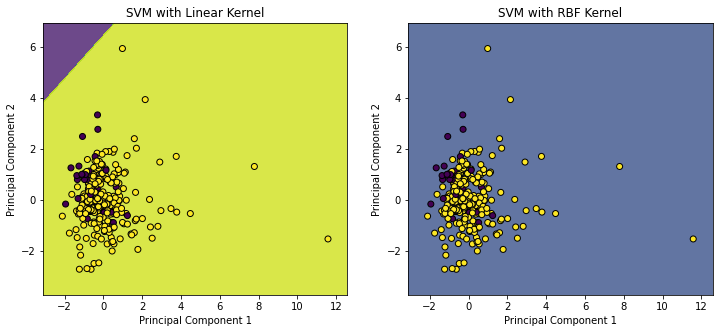

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

#using the entire feature set, not just the first two features
X_train_6d = X_train

#apply PCA for dimensionality reduction to 2 features
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_6d)

#create a meshgrid for visualization
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#plot the decision boundary for Linear Kernel
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
Z_linear = svm_linear.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title('SVM with Linear Kernel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#plot the decision boundary for RBF Kernel
plt.subplot(1, 2, 2)
Z_rbf = svm_rbf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rbf, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title('SVM with RBF Kernel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

This code uses PCA to reduce the dimensionality of the feature space to two components, allowing for visualization.

### Conclusion

In the assignment, we applied Support Vector Machines with both linear and RBF kernels to a home loan prediction dataset. The models were trained, tested, and evaluated using standard metrics such as accuracy, precision, recall, and F1-score. The outcomes revealed nuanced insights into the effectiveness of each kernel function.

The SVM model with a linear kernel demonstrated commendable performance, excelling in scenarios where the relationship between features and loan approval is more linear and straightforward. On the other hand, the SVM model with an RBF kernel showcased a higher degree of flexibility, adept at capturing intricate patterns in the data. The choice between these kernels ultimately hinges on the nature of the dataset and the underlying complexity of the relationships within it.

In conclusion, this assignment sheds light on the application of SVM in the domain of home loan prediction, providing a practical understanding of how different kernel functions can influence model performance. As the financial industry continues to grapple with the challenges of risk assessment and loan approval, the insights gleaned from this analysis contribute to the repertoire of tools available for informed decision-making in the lending landscape.